# Oasis Infobyte - OIBSIP- Data Science - March Phase 2


### Task 1 : Iris Flower Classification
### Author : Siddesh Pardeshi

# Problem Statement :

Iris flower has three species; setosa, versicolor and virginica, which differs according to their measurements.Now assume that you have the measurements of the iris flowers according to their species, and here your task to train a machine learning model that can learn from the measurements of the iris species and classify them. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset :

In [2]:
iris_df = pd.read_csv('Iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dropping the id column
iris_df.drop('Id', axis = 1, inplace = True)

In [5]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Information :

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observation :**
              From the above there are **no null** values present in the dataset and each **feature** seems to have correct **data type**.

### Data Description :

In [7]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking the number of counts of each Species
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploratory Data Analysis :

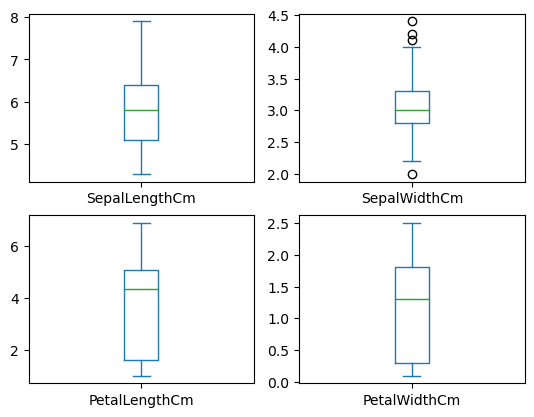

In [9]:
iris_df.plot.box(subplots = True, sharex = False, sharey = False, layout = (2,2))
plt.show()

**Observation :**
               
- From the above box plot **SepalWidth** has some **outliers**..
- The **median** in **PetalLength** and **PetalWidth** is more towards the **higher** side and the **majority** part is sitting towards the **lowerside**.

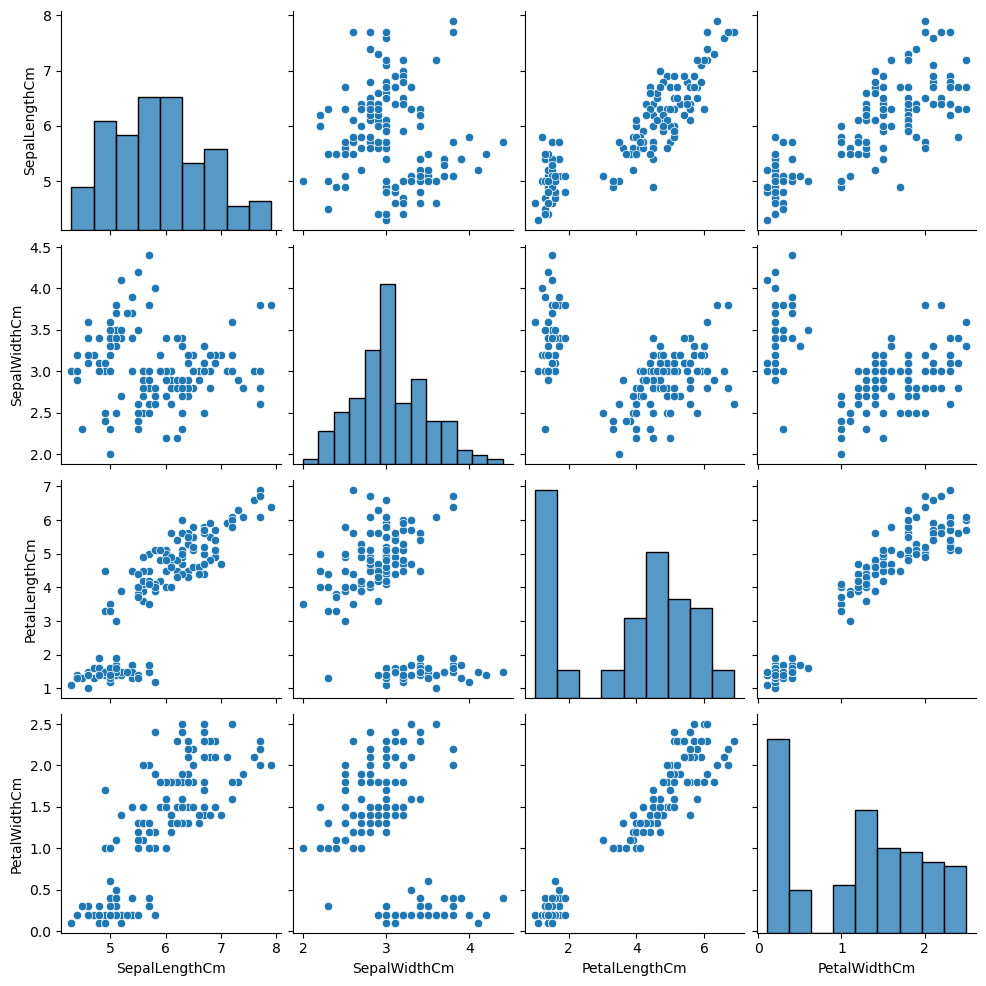

In [10]:
sns.pairplot(iris_df)

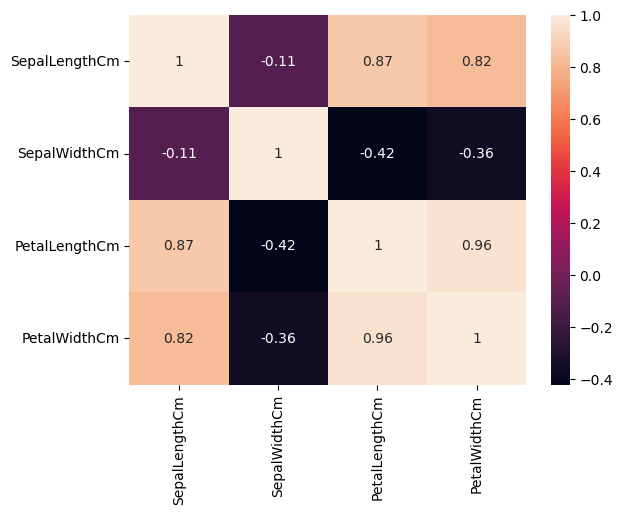

In [11]:
sns.heatmap(iris_df.corr(), annot = True)
plt.show()

**Observation :**

- **Strong** relationship between **PetalLength** and **PetalWidth** which is **0.96**.
- **Good** correlation between **SepalLength** and **PetalLength** which is **0.87**.
- **Weak** relationship between **SepalWidth** and **SepalLength** which is **-0.11**.

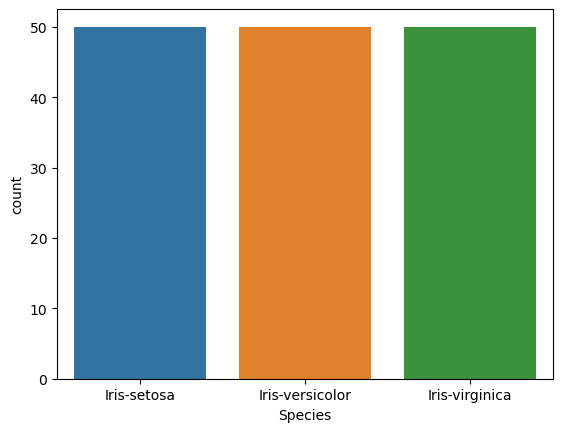

In [12]:
sns.countplot(iris_df['Species'])
plt.show()

In [13]:
#Using label encoder for Species column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_df['Species'] = encoder.fit_transform(iris_df['Species'])

In [14]:
iris_df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### Train Test Split :

In [15]:
x = iris_df.drop('Species', axis = 1)
y = iris_df['Species']

In [16]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [19]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Model Building and Evaluation :

In [20]:
#Importing the metrics required for evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix  

### Logistic Regression :

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [22]:
#Predicting on train data
y_pred_train = log_reg.predict(x_train)

#Predicting on test data
y_pred_test = log_reg.predict(x_test)

In [23]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.9833333333333333

In [24]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

1.0

In [25]:
def model_eval(actual, predicted):
    class_rep = classification_report(actual, predicted)
    print(class_rep)

In [26]:
#Training report
print('-----------Training Report-------------')
model_eval(y_pred_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [27]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_pred_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



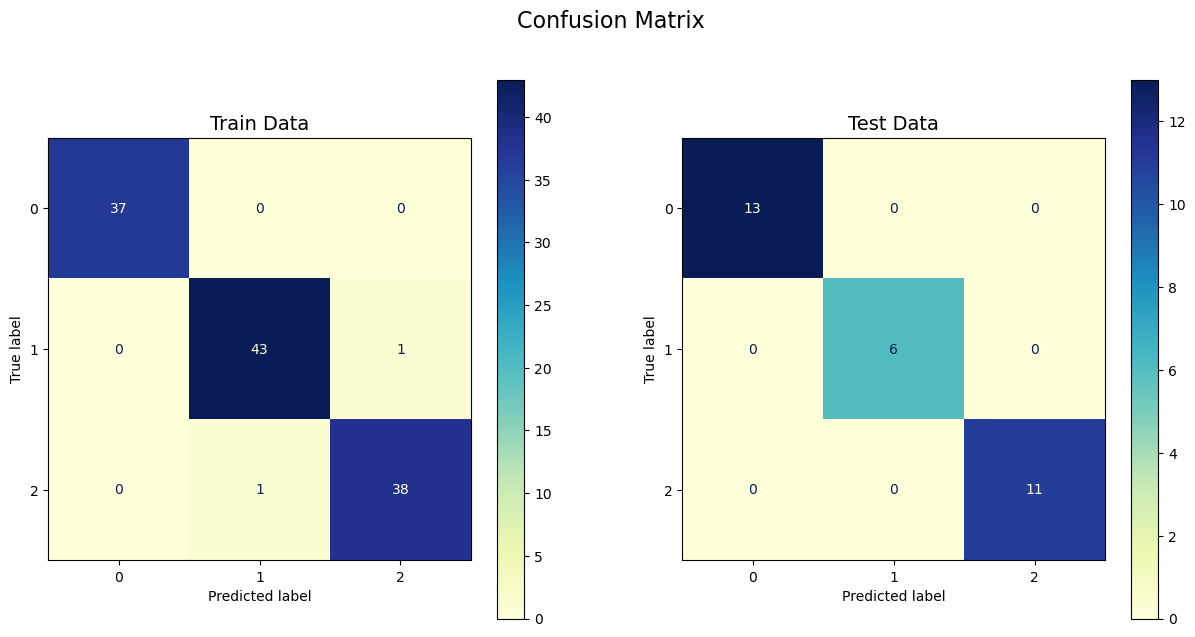

In [28]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=log_reg, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=log_reg, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### Decision tree Classifier :

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
#Predicting on train data
y_dt_train = dtree.predict(x_train)

#Predicting on test data
y_dt_test = dtree.predict(x_test)

In [31]:
acc_Dtree_train = dtree.score(x_train, y_train)
acc_Dtree_train

1.0

In [32]:
acc_Dtree_test = dtree.score(x_test, y_test)
acc_Dtree_test

1.0

In [33]:
#Training report
print('-----------Training Report-------------')
model_eval(y_dt_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [34]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_dt_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



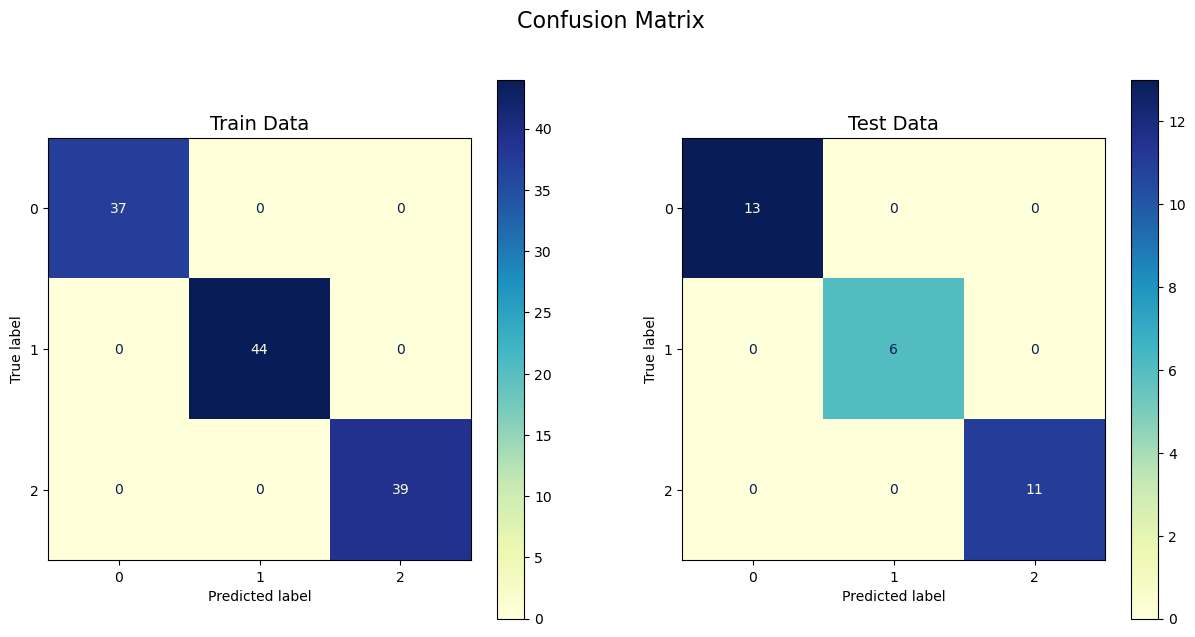

In [35]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtree, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtree, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### Random Forest Classifier :

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 20)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=20)

In [37]:
#Predicting on train data
y_rfc_train = rfc.predict(x_train)

#Predicting on test data
y_rfc_test = rfc.predict(x_test)

In [38]:
acc_randForest_train = rfc.score(x_train, y_train)
acc_randForest_train

1.0

In [39]:
acc_randForest_test = rfc.score(x_test, y_test)
acc_randForest_test

0.9666666666666667

In [40]:
#Training report
print('-----------Training Report-------------')
model_eval(y_rfc_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [41]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_rfc_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92         7
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



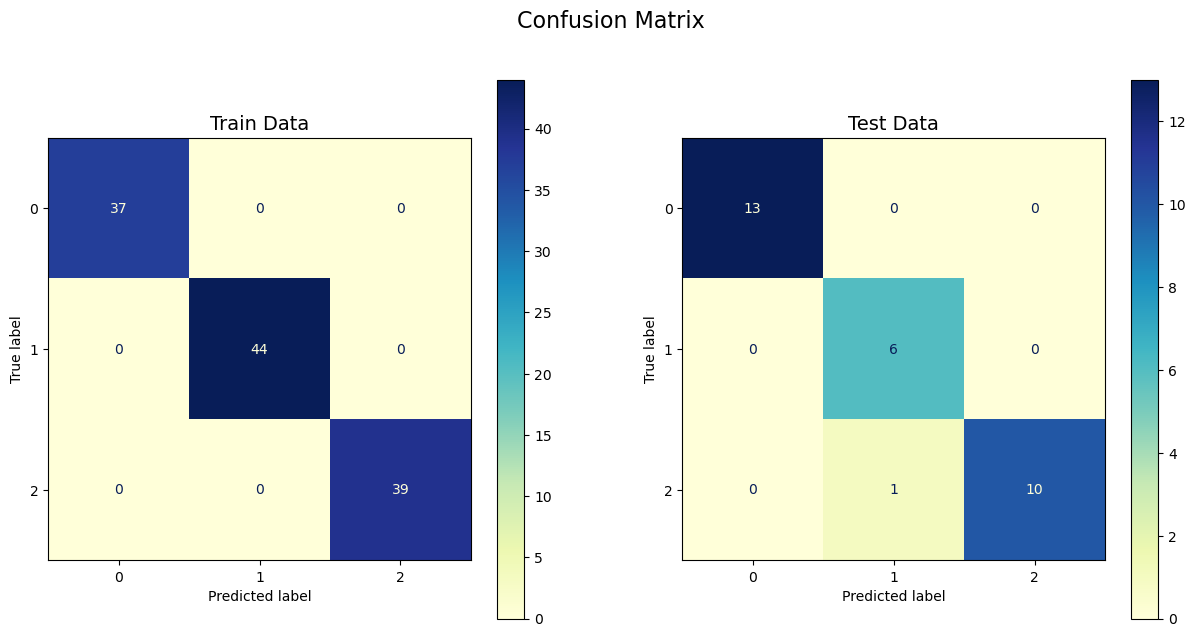

In [42]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rfc, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rfc, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

### K-Nearest Neighbors :

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
#Predicting on train data
y_knn_train = knn.predict(x_train)

#Predicting on test data
y_knn_test = knn.predict(x_test)

In [45]:
acc_knn_train = knn.score(x_train, y_train)
acc_knn_train

0.975

In [46]:
acc_knn_test = knn.score(x_test, y_test)
acc_knn_test

0.9666666666666667

In [47]:
#Training report
print('-----------Training Report-------------')
model_eval(y_knn_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.96      0.97        45
           2       0.95      0.97      0.96        38

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120



In [48]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_knn_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      1.00      0.91         5
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



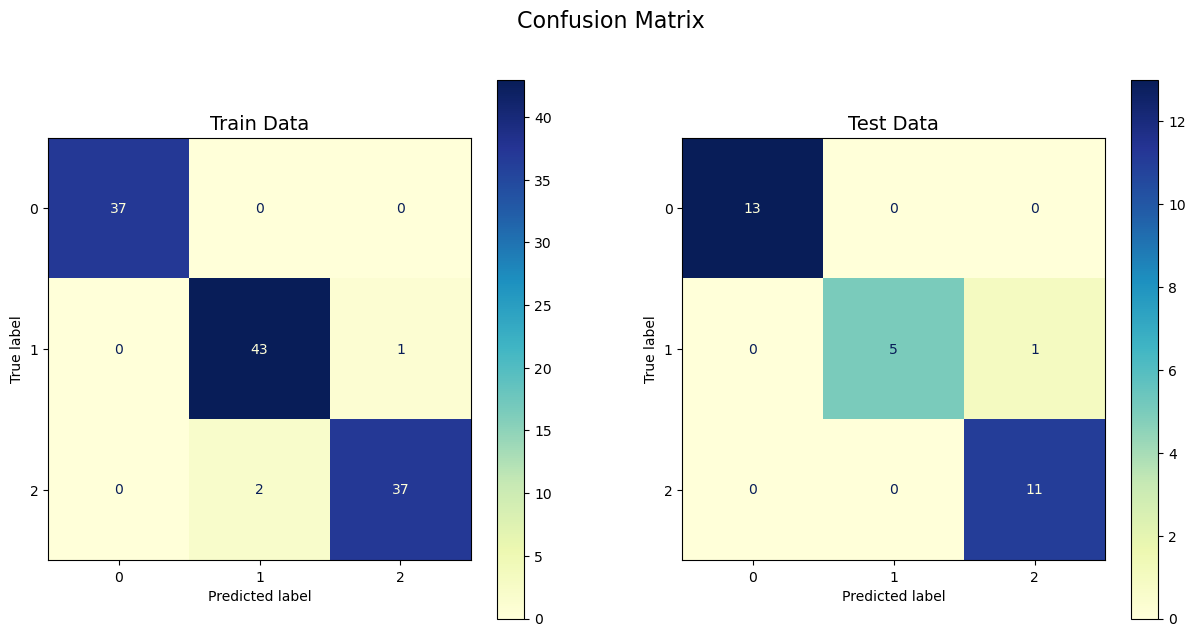

In [49]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=knn, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=knn, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [50]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier','Random Forest',
                                 'KNeighbors Classifier'],
                      'Training Score': [acc_log_train, acc_Dtree_train, acc_randForest_train, acc_knn_train],
                      'Testing Score': [acc_log_test, acc_Dtree_test, acc_randForest_test, acc_knn_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

,Model,Training Score,Testing Score
0,Decision Tree Classifier,1.000000,1.000000
1,Random Forest,1.000000,0.966667
2,Logistic Regression,0.983333,1.000000
3,KNeighbors Classifier,0.975000,0.966667
